# Ecuación de Schrödinger para el Átomo de Hidrógeno

La ecuación de Schrödinger independiente del tiempo describe el comportamiento de una partícula cuántica en un potencial dado. Para el caso del átomo de hidrógeno, el sistema consiste en un protón (el núcleo) y un electrón que interactúan mediante una fuerza coulombiana.

## Ecuación de Schrödinger independiente del tiempo

$$
\hat{H} \psi(\vec{r}) = E \psi(\vec{r})
$$

donde $ \hat{H} $ es el hamiltoniano del sistema, $ \psi(\vec{r}) $ es la función de onda espacial del electrón, y $ E $ es la energía del estado.

### Hamiltoniano del átomo de hidrógeno

$$
\hat{H} = -\frac{\hbar^2}{2\mu} \nabla^2 - \frac{e^2}{4\pi\varepsilon_0 r}
$$

- $ \hbar $: constante de Planck reducida  
- $ \mu $: masa reducida del electrón y el protón:  
  $ \mu = \frac{m_e m_p}{m_e + m_p} \approx m_e $  
- $ e $: carga del electrón  
- $ \varepsilon_0 $: permitividad del vacío  
- $ r $: distancia entre el electrón y el núcleo  

---

## Separación de variables en coordenadas esféricas

Debido a la simetría esférica del potencial, usamos coordenadas esféricas $ (r, \theta, \phi) $ y separamos la función de onda como:

$
\psi(r, \theta, \phi) = R(r) Y_\ell^m(\theta, \phi)
$

- $ R(r) $: parte radial  
- $ Y_\ell^m(\theta, \phi) $: armónicos esféricos (parte angular)

---

## Solución analítica

La solución completa es:

$
\psi_{n\ell m}(r, \theta, \phi) = R_{n\ell}(r) Y_\ell^m(\theta, \phi) = - \left [\left( \frac{2}{n a_0} \right)^{3} \frac{(n - \ell - 1)!}{2n \left[(n + \ell)!\right]^{3}} \right] ^{\frac{1}{2}} \rho^\ell e^{-\rho/2} \cdot L_{n + \ell}^{2\ell + 1}(\rho)\cdot Y_\ell^{m}(\theta, \phi)
$


- $ a_0 = \frac{4\pi \varepsilon_0 \hbar^2}{\mu e^2} $: radio de Bohr  
- $\rho = \frac{2r}{na_{0}}$
- $ L_k^\alpha(x) $: polinomios de Laguerre generalizados   

Los niveles de energía permitidos son:

$
E_n = - \frac{\mu e^4}{2 (4\pi \varepsilon_0)^2 \hbar^2} \cdot \frac{1}{n^2} = - \frac{13.6\, \text{eV}}{n^2}
$

con $ n = 1, 2, 3, \dots $

---

## Números cuánticos del átomo de hidrógeno

Cada estado está etiquetado por tres números cuánticos:

- $ n = 1, 2, 3, \dots $: número cuántico principal  
- $ \ell = 0, 1, \dots, n - 1 $: momento angular orbital  
- $ m = -\ell, \dots, \ell $: componente $ z $ del momento angular

---


In [27]:
# Si se desea ver otro estado, cambie los siguientes números cuánticos según las reglas anteriores
n = 4
l = 3
m = 0
factor = 6 # Tamaño de la grilla de la gráfica, cambiese de ser necesario para que se vea mejor el resultado

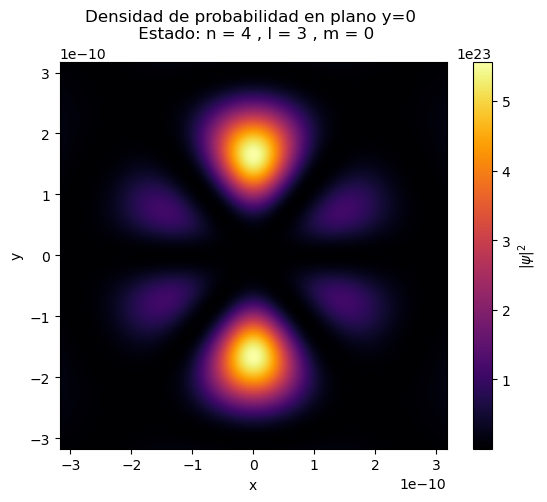

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.special import factorial
from scipy.special import assoc_laguerre
from scipy.special import sph_harm_y

def psi(n,l,m, x, y, z):
	a0 = sc.physical_constants["Bohr radius"][0] # Radio de Bohr
	aux = -np.sqrt(((2/(n*a0))**3)*factorial(n-l-1)/(2*n*(factorial(n+l))**3)) # Factor de normalizacion de la funcion de onda

	r = np.sqrt(x**2 + y**2 + z**2)
	theta = np.arccos(np.divide(z, r, out=np.zeros_like(r), where=r != 0))
	phi = np.arctan2(y,x) 

	rho = 2*r/(n*a0)

	return aux*(rho**l)*np.exp(-rho/2)*assoc_laguerre(rho,n+l,2*l+1)*sph_harm_y(l,m,theta, phi)

a0 = sc.physical_constants["Bohr radius"][0] # Radio de Bohr
L = factor*a0
N = 200
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Estado
psi_vals = psi(n,l,m, X, Y, Z)

def probability_density(psi):
	return np.abs(psi)**2

rho_vals = probability_density(psi_vals)

# Cortar plano z=0
index_z0 = N // 2

rho_slice = rho_vals[:,index_z0,:] 


# Aplicar máscara en 2D
mask = rho_slice > 0.0
masked_vals = np.where(mask, rho_slice, np.nan)  

plt.figure(figsize=(6, 5))
plt.imshow(masked_vals.T, extent=[-L, L, -L, L], origin='lower', cmap='inferno')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Densidad de probabilidad en plano y=0 \n' + f' Estado: n = {n} , l = {l} , m = {m}')
plt.colorbar(label= r'$|\psi|^2$')
plt.tight_layout()
plt.show()